In [9]:
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
import cv2

def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram


In [10]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)


In [11]:
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

In [12]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

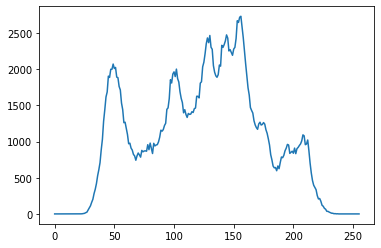

In [27]:
img = cv2.imread('lena.jpg', 0)
flat = img.flatten()
hist = get_histogram(flat, 256)

plt.plot(hist)

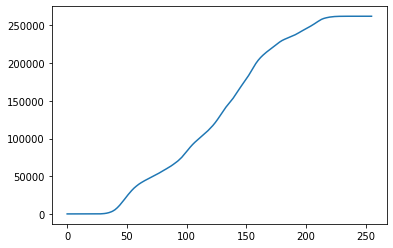

In [28]:
# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

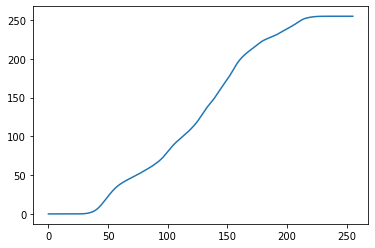

In [29]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

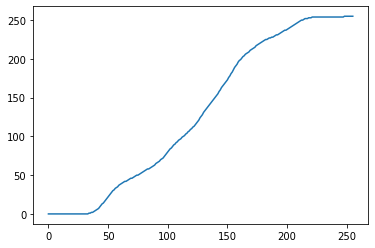

In [30]:
# cast it back to uint8 as floating point values in images are not allowed
cs = cs.astype('uint8')

plt.plot(cs)

(array([5477., 4340., 5478., 6072., 4035., 5537., 5950., 4521., 5138.,
        5853., 5469., 5658., 4529., 5387., 5259., 3898., 5773., 5110.,
        5753., 5479., 5734., 4857., 5669., 4310., 4785., 4835., 6630.,
        3870., 5872., 4374., 7033., 4906., 4524., 6705., 4729., 5318.,
        2719., 7753., 4332., 5299., 6814., 4875., 4971., 5090., 5284.,
        5117., 5258., 4569., 5107., 6089.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

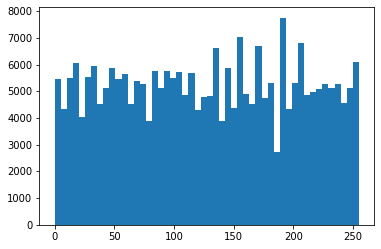

In [31]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [32]:
# putting array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[203, 201, 199, ..., 212, 183, 131],
       [201, 201, 201, ..., 215, 186, 121],
       [201, 201, 203, ..., 212, 186, 126],
       ...,
       [  9,   7,  24, ...,  85,  82,  78],
       [  6,   7,  31, ...,  85,  89,  90],
       [  7,  11,  34, ...,  84,  90,  95]], dtype=uint8)

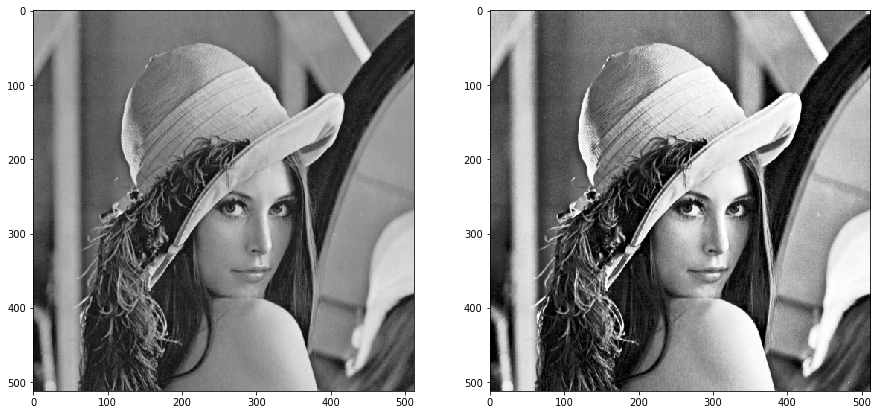

In [33]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)